# Interop with Microsoft resource estimator

Having interopability with Microsoft's open-source resource estimator is useful because it allows users more flexiblity with their Qualtran programs and allows users to verify estimates given by Qualtran's resource estimator tooling.

In this notebook, we will demonstrate doing resource estimation on the `ModExp` Bloq, the essential subroutine in Shor's factoring algorithm.

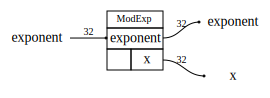

In [1]:
from qualtran.bloqs.cryptography.rsa import ModExp
from qualtran.drawing import show_bloq

N = 13*17 # integer to factor
g = 8

mod_exp = ModExp(base=g, mod=N, exp_bitsize=32, x_bitsize=32)
show_bloq(mod_exp)

In the next cell we have a function which takes in a Bloq and returns LogicalCounts, a python object which stores information about the logical data and gate counts. You can initialize the LogicalCounts object with a dictionary with information about your quantum algorithm. You can populate fields such as `numQubits` and `tCount` with information from a Qualtran [`Bloq`](/reference/qualtran/Bloq.md) as show below. For a more complete overview of the fields which you can specify in LogicalCounts, click [here](https://learn.microsoft.com/en-us/azure/quantum/resource-estimator-known-estimates?tabs=tabid-known-estimates-qsharp) and look for the table which specifies the available functions with AccountForEstimates.

In [2]:
def get_bloq_logical_counts(bloq):
    from qsharp.estimator import LogicalCounts
    from qualtran._infra.gate_with_registers import get_named_qubits

    # This way of calculating the number of qubits will be inaccurate if a sub_bloq
    # allocates new qubits.
    num_qubits = bloq.signature.n_qubits()
    complexity = bloq.t_complexity()

    return LogicalCounts({
        "numQubits": num_qubits,
        "tCount": complexity.t,
        "rotationCount": complexity.rotations,
        "rotationDepth": complexity.rotations
    })

The LogicalCounts object has the key method, `estimate`, which returns an `EstimatorResult` which contains the physical resource estimates. By running the cell below, you can see a nice display of the physical resource estimates including runtime, physical qubits, and many more important resource estimates. For a more complete description of the `EstimatorResult`, click [here](https://learn.microsoft.com/en-us/azure/quantum/overview-resource-estimator-output-data).

In [3]:
estimates = get_bloq_logical_counts(mod_exp).estimate([
    {"qubitParams": {"name": "qubit_gate_ns_e3"}},
    {"qubitParams": {"name": "qubit_gate_ns_e4"}},
    {"qubitParams": {"name": "qubit_maj_ns_e4"}, "surfaceCode": {"name": "floquet_code"}},
    {"qubitParams": {"name": "qubit_maj_ns_e6"}, "surfaceCode": {"name": "floquet_code"}},
])

estimates

Item,0,1,2,3
Runtime,11 secs,6 secs,45 secs,19 secs
rQOPS,18.10M,34.55M,4.47M,10.86M
Physical qubits,404.06k,72.42k,402.86k,24.90k
Item,0,1,2,3
Logical algorithmic qubits,152,152,152,152
Algorithmic depth,1.33M,1.33M,1.33M,1.33M
Logical depth,1.33M,1.33M,1.33M,1.33M
Clock frequency,119.05k,227.27k,29.41k,71.43k
Number of T states,1.33M,1.33M,1.33M,1.33M
Number of T factories,15,11,15,10


You can display more complex UIs on top of estimates with qsharp_widgets. For example, the code below displays a chart with information on the physical qubit counts. To learn more about using qsharp_widgets to create other informative graphics such as a Space-time diagram, click [here](https://learn.microsoft.com/en-us/azure/quantum/overview-resource-estimator-output-data#space-time-diagram).

In [4]:
from qsharp_widgets import SpaceChart
SpaceChart(estimates)

SpaceChart(estimates={0: {'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code', 'errorCorre…